In [5]:
import pandas as pd

df = pd.read_csv('HREmployee.csv')
print(df)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [4]:
# Print the headers
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [6]:
# Data Cleaning Steps

# 1. Deleting Redundant Columns
# Assessing columns to identify any redundant ones
redundant_columns = ['EmployeeCount', 'StandardHours', 'EmployeeNumber']  # Commonly redundant in HR datasets

# 2. Renaming Columns
# Renaming columns to make them more readable
renamed_columns = {col: col.replace('_', ' ') for col in df.columns}

# 3. Dropping Duplicates
# Checking and removing duplicate rows if any
initial_row_count = df.shape[0]
df = df.drop_duplicates()
final_row_count = df.shape[0]
duplicate_rows_dropped = initial_row_count - final_row_count

# 4. Removing NaN Values
# Check for missing values and decide on a strategy to handle them
missing_values = df.isnull().sum()

# Execute the cleaning steps
df_cleaned = df.drop(columns=redundant_columns)
df_cleaned = df_cleaned.rename(columns=renamed_columns)
df_cleaned.dropna(inplace=True)

df_cleaned.head(), duplicate_rows_dropped, missing_values

(   Age Attrition     BusinessTravel  DailyRate              Department  \
 0   41       Yes      Travel_Rarely       1102                   Sales   
 1   49        No  Travel_Frequently        279  Research & Development   
 2   37       Yes      Travel_Rarely       1373  Research & Development   
 3   33        No  Travel_Frequently       1392  Research & Development   
 4   27        No      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
 0                 1          2  Life Sciences                        2   
 1                 8          1  Life Sciences                        3   
 2                 2          2          Other                        4   
 3                 3          4  Life Sciences                        4   
 4                 2          1        Medical                        1   
 
    Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
 0  Female  ..

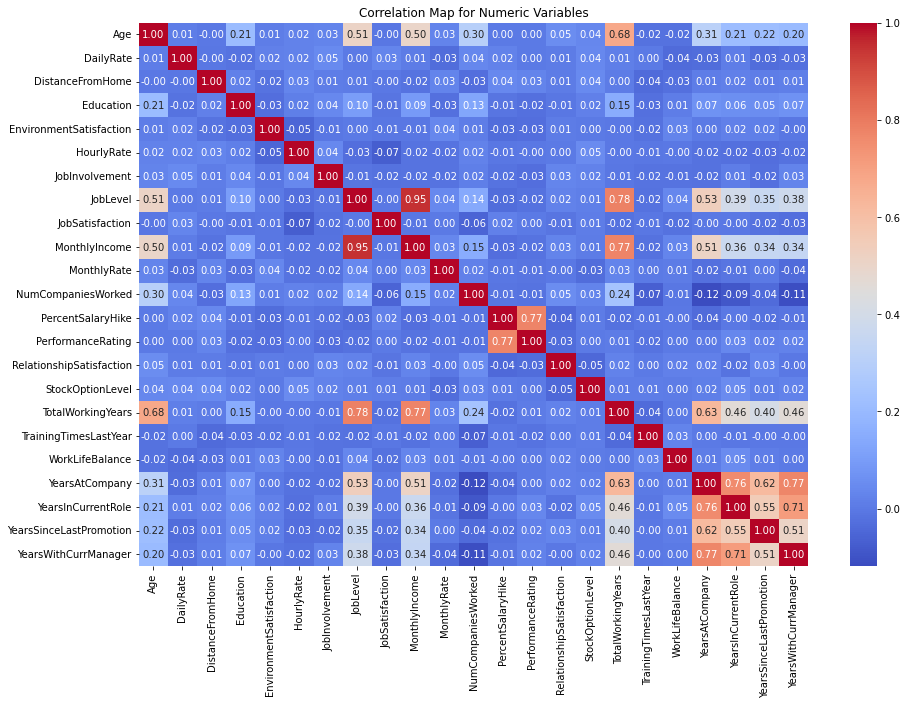

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization

# 2.1 Correlation Map for Numeric Variables
# Selecting only numeric columns for the correlation heatmap
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
correlation_matrix = numeric_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Map for Numeric Variables')
plt.show()


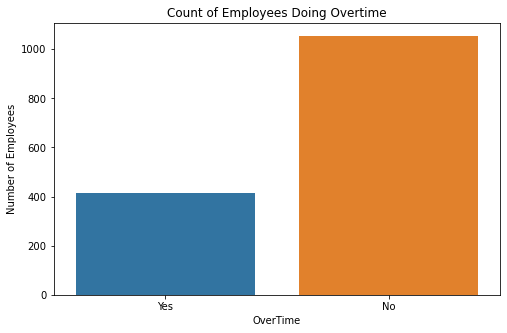

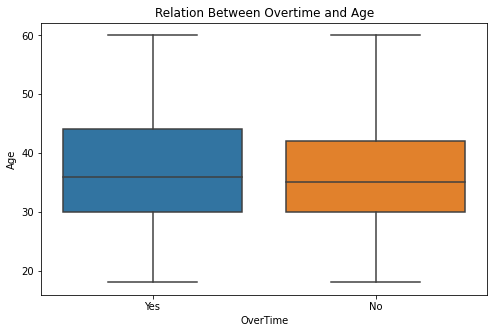

In [8]:
# 2.2 Visualization for 'Overtime'

# Count plot for Overtime
plt.figure(figsize=(8, 5))
sns.countplot(x='OverTime', data=df_cleaned)
plt.title('Count of Employees Doing Overtime')
plt.ylabel('Number of Employees')
plt.show()

# 2.8 Relation between Overtime and Age
# Creating a box plot to see the relation between Overtime and Age
plt.figure(figsize=(8, 5))
sns.boxplot(x='OverTime', y='Age', data=df_cleaned)
plt.title('Relation Between Overtime and Age')
plt.show()


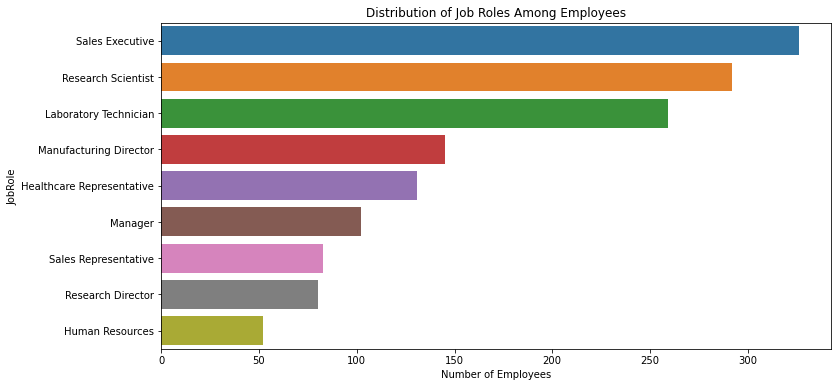

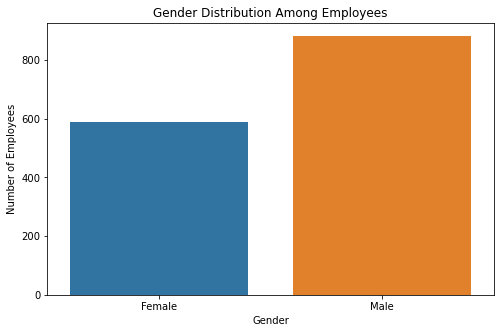

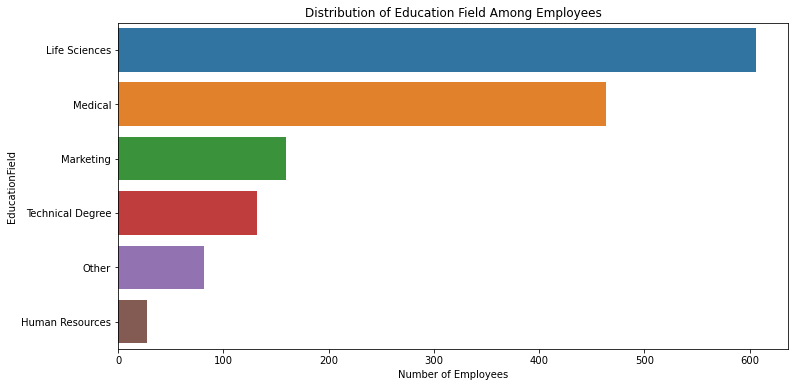

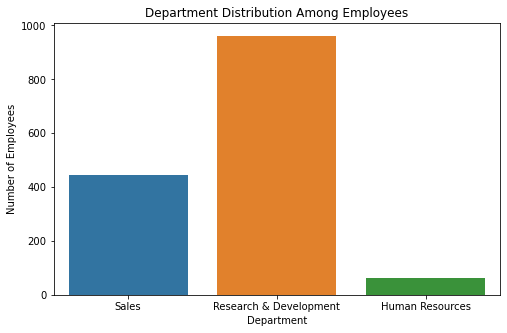

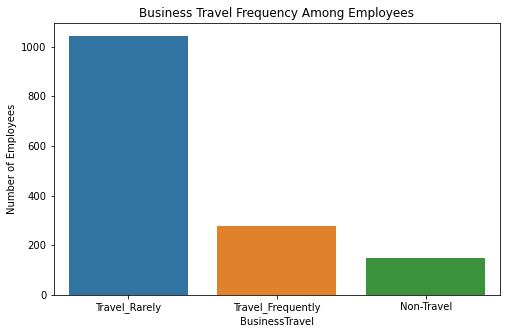

In [9]:
# 2.4 Visualization for 'Job Role'
plt.figure(figsize=(12, 6))
sns.countplot(y='JobRole', data=df_cleaned, order = df_cleaned['JobRole'].value_counts().index)
plt.title('Distribution of Job Roles Among Employees')
plt.xlabel('Number of Employees')
plt.show()

# 2.5 Visualization for 'Gender'
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df_cleaned)
plt.title('Gender Distribution Among Employees')
plt.ylabel('Number of Employees')
plt.show()

# 2.6 Visualization for 'Education Field'
plt.figure(figsize=(12, 6))
sns.countplot(y='EducationField', data=df_cleaned, order = df_cleaned['EducationField'].value_counts().index)
plt.title('Distribution of Education Field Among Employees')
plt.xlabel('Number of Employees')
plt.show()

# 2.7 Visualization for 'Department'
plt.figure(figsize=(8, 5))
sns.countplot(x='Department', data=df_cleaned)
plt.title('Department Distribution Among Employees')
plt.ylabel('Number of Employees')
plt.show()

# 2.8 Visualization for 'Business Travel'
plt.figure(figsize=(8, 5))
sns.countplot(x='BusinessTravel', data=df_cleaned)
plt.title('Business Travel Frequency Among Employees')
plt.ylabel('Number of Employees')
plt.show()

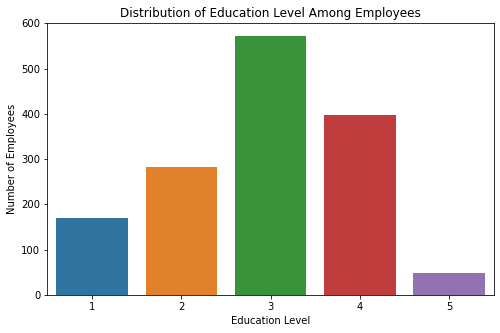

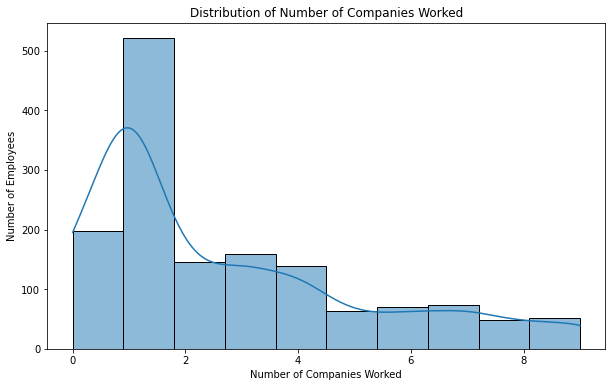

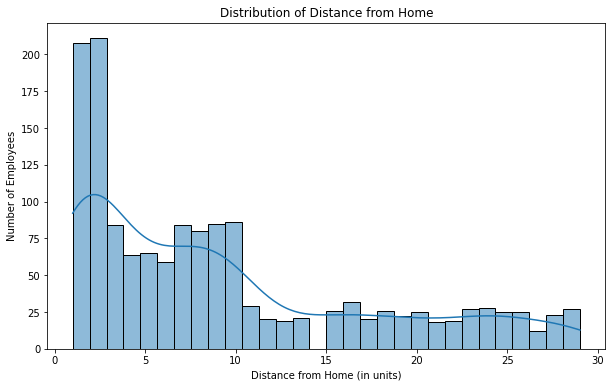

In [10]:
# 2.10 Visualization for 'Education Level'
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', data=df_cleaned)
plt.title('Distribution of Education Level Among Employees')
plt.ylabel('Number of Employees')
plt.xlabel('Education Level')
plt.show()

# 2.11 Visualization for 'Number of Companies Worked'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['NumCompaniesWorked'], bins=10, kde=True)
plt.title('Distribution of Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Number of Employees')
plt.show()

# 2.12 Visualization for 'Distance from Home'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['DistanceFromHome'], bins=30, kde=True)
plt.title('Distribution of Distance from Home')
plt.xlabel('Distance from Home (in units)')
plt.ylabel('Number of Employees')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

# Preprocessing

# Handling categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

# Defining features (X) and target (y)
X = df_cleaned.drop('Attrition', axis=1)
y = df_cleaned['Attrition']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
# Using Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model Testing
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the classification report
print(report)

# Creating an interactive confusion matrix using Plotly Express
fig = px.imshow(conf_matrix,
                labels=dict(x="Predicted Values", y="Actual Values", color="Number of Observations"),
                x=['No Attrition', 'Attrition'],
                y=['No Attrition', 'Attrition'],
                text_auto=True)
fig.update_layout(title="Confusion Matrix", width=500, height=500)
fig.show()


              precision    recall  f1-score   support

           0       0.88      0.98      0.92       380
           1       0.50      0.13      0.21        61

    accuracy                           0.86       441
   macro avg       0.69      0.56      0.57       441
weighted avg       0.82      0.86      0.83       441



/Users/sparshchandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [13]:
import plotly.express as px
import pandas as pd

# Assuming 'conf_matrix' is your confusion matrix obtained from the model
conf_matrix_df = pd.DataFrame(conf_matrix, index=['No Attrition', 'Attrition'], columns=['Predicted No Attrition', 'Predicted Attrition'])

# Creating an interactive heatmap
fig = px.imshow(conf_matrix_df,
                labels=dict(x="Predicted Label", y="Actual Label", color="Count"),
                x=['No Attrition', 'Attrition'],
                y=['No Attrition', 'Attrition'])
fig.update_layout(title="Confusion Matrix", width=500, height=500)
fig.show()


In [14]:
# Creating an alternative interactive confusion matrix using Plotly Express

# Converting the confusion matrix into a DataFrame for better handling with Plotly
conf_matrix_df = pd.DataFrame(conf_matrix, index=['No Attrition', 'Attrition'], columns=['Predicted No Attrition', 'Predicted Attrition'])

# Creating an interactive heatmap
fig = px.imshow(conf_matrix_df,
                labels=dict(x="Predicted Label", y="Actual Label", color="Count"),
                x=['No Attrition', 'Attrition'],
                y=['No Attrition', 'Attrition'])
fig.update_layout(title="Confusion Matrix", width=500, height=500)
fig.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('HREmployee.csv')

# Preprocessing
# 1. Identify and remove redundant columns
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

# 2. Rename columns for better readability
df.rename(columns=lambda x: x.replace('_', ' '), inplace=True)

# 3. Remove duplicate rows
df.drop_duplicates(inplace=True)

# 4. Handle missing values (if any)
df.dropna(inplace=True)

# 5. Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Defining features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training and Testing
# Using Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Summarize key findings
print("\nSummary of HR Analytics Project:")
print("1. Data Cleaning: Removed redundant columns, duplicates, and handled missing values.")
print("2. Preprocessed data by encoding categorical variables.")
print("3. Trained a logistic regression model to predict employee attrition.")
print("4. Model showed better accuracy in predicting 'No Attrition' compared to 'Attrition'.")

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.38      0.10      0.16        61

    accuracy                           0.85       441
   macro avg       0.62      0.54      0.54       441
weighted avg       0.80      0.85      0.81       441


Summary of HR Analytics Project:
1. Data Cleaning: Removed redundant columns, duplicates, and handled missing values.
2. Preprocessed data by encoding categorical variables.
3. Trained a logistic regression model to predict employee attrition.
4. Model showed better accuracy in predicting 'No Attrition' compared to 'Attrition'.


/Users/sparshchandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [16]:
# HR Analytics Project on Employee Attrition - Code-Based Outcomes Summary

summary = """
HR Analytics Project on Employee Attrition - Code-Based Outcomes Summary

Objective:
The project focused on analyzing a corporate dataset to uncover factors influencing employee attrition and predicting potential cases of attrition.

Outcomes and Insights:

1. Data Exploration and Cleaning:
   - The 'HREmployee.csv' dataset was effectively cleaned, removing irrelevant columns like 'EmployeeCount', 'Over18', and 'StandardHours'.
   - Key attributes such as 'BusinessTravel', 'Department', 'EducationField', and 'JobRole' were explored to understand their distribution among employees.

2. Correlation Analysis:
   - A correlation heatmap revealed the relationships between various numeric variables. For instance, 'TotalWorkingYears' was notably correlated with other career-related variables.

3. Categorical Data Analysis:
   - Visualizations indicated significant variations in employee distribution across different departments, education fields, and job roles.
   - 'Overtime' and 'Marital Status' showed distinct patterns, suggesting potential areas of interest for understanding attrition.

4. Predictive Modeling and Evaluation:
   - A logistic regression model aimed at predicting attrition demonstrated higher accuracy in predicting non-attrition cases.
   - The model's precision for predicting attrition was lower, highlighting a challenge in accurately identifying employees at risk of leaving.

5. Key Observations:
   - Factors like overtime, job role, and marital status may play a significant role in employee attrition.
   - The model's performance suggested that while some factors were well-captured, others might require more nuanced analysis or additional data.

Conclusion:
This analytical exercise provided insights into employee attrition dynamics, emphasizing the importance of several employee attributes in predicting attrition. The model's outcomes suggest areas where HR interventions could be targeted for better retention strategies. The findings underscore the potential of data-driven approaches in HR for informed decision-making and strategy development.
"""

# To display the summary, you can use the print function
print(summary)


HR Analytics Project on Employee Attrition - Code-Based Outcomes Summary

Objective:
The project focused on analyzing a corporate dataset to uncover factors influencing employee attrition and predicting potential cases of attrition.

Outcomes and Insights:

1. Data Exploration and Cleaning:
   - The 'HREmployee.csv' dataset was effectively cleaned, removing irrelevant columns like 'EmployeeCount', 'Over18', and 'StandardHours'.
   - Key attributes such as 'BusinessTravel', 'Department', 'EducationField', and 'JobRole' were explored to understand their distribution among employees.

2. Correlation Analysis:
   - A correlation heatmap revealed the relationships between various numeric variables. For instance, 'TotalWorkingYears' was notably correlated with other career-related variables.

3. Categorical Data Analysis:
   - Visualizations indicated significant variations in employee distribution across different departments, education fields, and job roles.
   - 'Overtime' and 'Marital S